In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
df = pd.read_excel('heart.xlsx')

In [9]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
x = df.drop(['output'], axis = 1)

In [11]:
y = df['output']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df.groupby('output').size()

output
0    138
1    165
dtype: int64

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

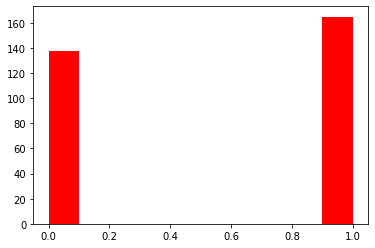

In [35]:
plt.hist(df['output'], color = 'red')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [37]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test) 

In [38]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [39]:
print("For K=15 \n")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

For K=15 

[[17  8]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.80      0.92      0.86        36

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [40]:
accuracy_rate=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

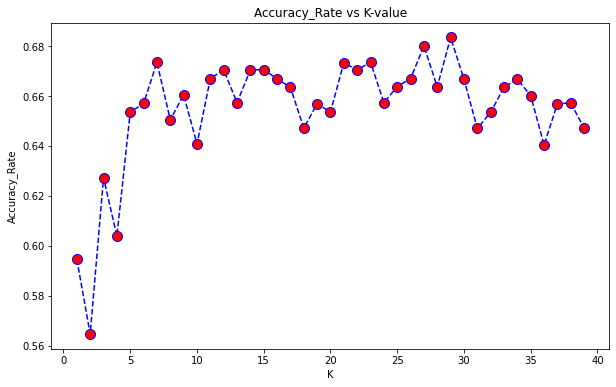

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color="blue",markersize=10,linestyle="dashed",marker="o",
            markerfacecolor="red")
plt.title("Accuracy_Rate vs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy_Rate")
plt.show()

In [42]:
accuracy= accuracy_score(y_test, pred)
accuracy

0.819672131147541